**Week 4 Discussion - KNN & Decision Trees**


**Decision Trees**:  

Can be used for *classification* or *regression*.  

In *regression*, decision trees learn from data using a set of if-then-else decision rules. 

Good for handling tabular data with either numerical or categorical features.



<img src="dt_example.png">

In [13]:
# Regression Tree Example - Outcome is a continuous variable

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import copy


In [14]:
# Create artificial data
X = np.linspace(0,2*3.14159,100).reshape(-1, 1)
y = np.cos(X).ravel()
y_noise = copy.copy(y)

# what happens if noisy points exists?  Is a large depth good? Overfitting maybe?
y_noise[::5] += 1.5

print(X)
print(y)

[[0.        ]
 [0.06346646]
 [0.12693293]
 [0.19039939]
 [0.25386586]
 [0.31733232]
 [0.38079879]
 [0.44426525]
 [0.50773172]
 [0.57119818]
 [0.63466465]
 [0.69813111]
 [0.76159758]
 [0.82506404]
 [0.88853051]
 [0.95199697]
 [1.01546343]
 [1.0789299 ]
 [1.14239636]
 [1.20586283]
 [1.26932929]
 [1.33279576]
 [1.39626222]
 [1.45972869]
 [1.52319515]
 [1.58666162]
 [1.65012808]
 [1.71359455]
 [1.77706101]
 [1.84052747]
 [1.90399394]
 [1.9674604 ]
 [2.03092687]
 [2.09439333]
 [2.1578598 ]
 [2.22132626]
 [2.28479273]
 [2.34825919]
 [2.41172566]
 [2.47519212]
 [2.53865859]
 [2.60212505]
 [2.66559152]
 [2.72905798]
 [2.79252444]
 [2.85599091]
 [2.91945737]
 [2.98292384]
 [3.0463903 ]
 [3.10985677]
 [3.17332323]
 [3.2367897 ]
 [3.30025616]
 [3.36372263]
 [3.42718909]
 [3.49065556]
 [3.55412202]
 [3.61758848]
 [3.68105495]
 [3.74452141]
 [3.80798788]
 [3.87145434]
 [3.93492081]
 [3.99838727]
 [4.06185374]
 [4.1253202 ]
 [4.18878667]
 [4.25225313]
 [4.3157196 ]
 [4.37918606]
 [4.44265253]
 [4.50

<class 'numpy.ndarray'>


<function matplotlib.pyplot.show(*args, **kw)>

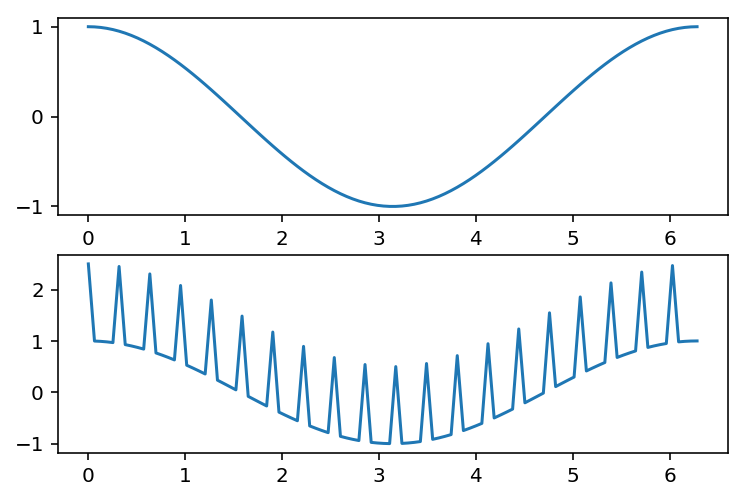

In [87]:
import matplotlib.pyplot as plt

#plt = figure()
fig, axs = plt.subplots(2,1, dpi=4*36)
print(type(axs))
plt.subplot(2,1,1)
plt.plot(X, y)
plt.subplot(2,1,2)
plt.plot(X, y_noise)
plt.show

In [28]:
# Fit regression model
dtr1 = DecisionTreeRegressor(max_depth=2)
dtr2 = DecisionTreeRegressor(max_depth=5)
dtr3 = DecisionTreeRegressor(max_depth=10)

dtr1.fit(X, y)
dtr2.fit(X, y)
dtr3.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
# Fit regression model
dtr1_n = DecisionTreeRegressor(max_depth=2)
dtr2_n = DecisionTreeRegressor(max_depth=5)
dtr3_n = DecisionTreeRegressor(max_depth=10)

dtr1_n.fit(X, y_noise)
dtr2_n.fit(X, y_noise)
dtr3_n.fit(X, y_noise)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
# Obtain predictions
X_test = np.arange(0.0,2*3.14159,0.01)[:,np.newaxis]

y1 = dtr1.predict(X_test)
y2 = dtr2.predict(X_test)
y3 = dtr3.predict(X_test)

y1_n = dtr1_n.predict(X_test)
y2_n = dtr2_n.predict(X_test)
y3_n = dtr3_n.predict(X_test)


<Figure size 432x288 with 0 Axes>

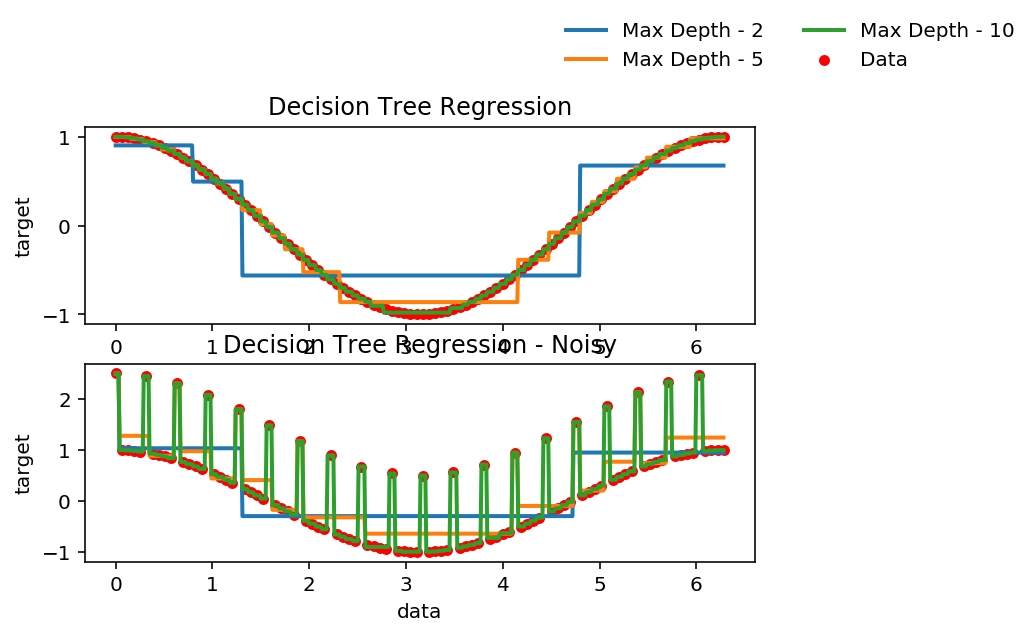

In [85]:

# Plot the results
plt.figure()

plt.subplots(2,1, dpi=36*4)

plt.subplot(2,1,1)
plt.scatter(X, y, s=20, c="red", label="Data")

plt.plot(X_test, y1, label="Max Depth - 2", linewidth=2)
plt.plot(X_test, y2, label="Max Depth - 5", linewidth=2)
plt.plot(X_test, y3, label="Max Depth - 10", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
#plt.legend()
plt.legend(loc='right', bbox_to_anchor= (1.4, 1.41), ncol=2, 
            borderaxespad=0, frameon=False)

plt.subplot(2,1,2)
plt.scatter(X, y_noise, s=20, c="red", label="Data")

plt.plot(X_test, y1_n, label="Max Depth - 2", linewidth=2)
plt.plot(X_test, y2_n, label="Max Depth - 5", linewidth=2)
plt.plot(X_test, y3_n, label="Max Depth - 10", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression - Noisy")
#plt.legend(loc='best', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)

#plt.tight_layout()
plt.show()